<a href="https://colab.research.google.com/github/xxrdfixx/AI_Applications/blob/main/Week9_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = 'book_store_sales.csv'

def readfile(file_name):
  file = open(file_name,  'r' , encoding= 'utf-8')
  next(file)
  data = []
  for line in (file):
    values = line.split(',')
    data.append(float(values[1]))
  file.close()
  return np.array(data, dtype=np.float32)

# Read data and split into training and test data.
sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

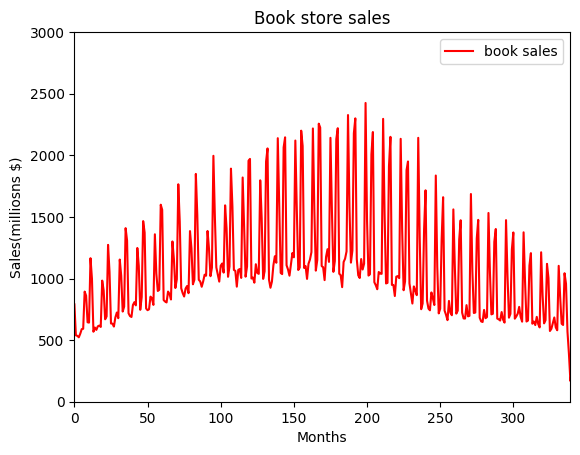

In [6]:
x = range(len(sales))
plt.plot(x, sales, 'r-', label='book sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.0])
plt.xlabel('Months')
plt.ylabel('Sales(milliosns $)')
plt.legend()
plt.show()

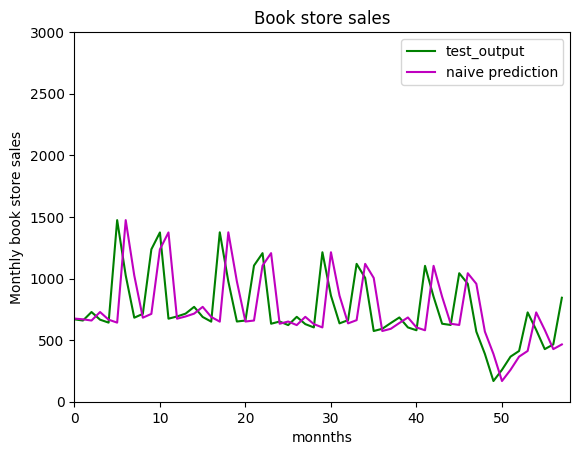

In [7]:
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('monnths')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [10]:
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [11]:
# Create training examples.
train_months = len(train_sales)
train_x = np.zeros((train_months-MIN, train_months-1, 1))
train_y = np.zeros((train_months-MIN, 1))

for i in range(0, train_months-MIN):
  train_x[i,- (i+MIN) :, 0] = train_sales_std[0:i+MIN]
  train_y[i, 0] = train_sales_std[i+MIN]

# Create test examples.
test_months = len(test_sales)
test_x = np.zeros((test_months-MIN, test_months-1, 1))
test_y = np.zeros((test_months-MIN, 1))

for i in range(0, test_months-MIN) :
  test_x[i, - (i+MIN):, 0] = test_sales_std[0: i+MIN]
  test_y[i, 0] = test_sales_std[i+MIN]

# Create RNN model
model = Sequential()
model.add(SimpleRNN(128, activation='relu',input_shape= (None, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam',metrics = ['mean_absolute_error'])
model.summary()
history = model.fit(train_x, train_y,validation_data = (test_x, test_y), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769 (65.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
17/17 - 3s - loss: 0.8489 - mean_absolute_error: 0.6787 - val_loss: 0.2738 - val_mean_absolute_error: 0.3890 - 3s/epoch - 175ms/step
Epoch 2/100
17/17 - 1s - loss: 0.4331 - mean_absolute_error: 0.4917 - val_loss: 0.3426 - val_mean_absolute_error: 0.5013 - 811ms/epoch - 48ms/step
Epoch 3/100
17/17 - 1s - loss: 0.2547 - mean_absolute_error: 0.4012 - val_loss: 0.1806 - val_mean_absolute_error: 0.3191 - 1

naive test mse:  0.4723033
naive test mean abs:  0.48052385
1/1 [==============================] - 0s 173ms/step


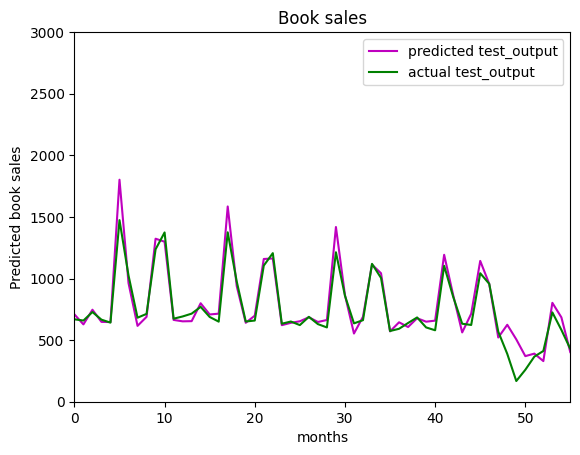

In [12]:
#Create naive prediction based on standardized data.
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std[MIN-1:-1]
mean_squared_error = np.mean(np.square(naive_prediction - test_output))
mean_abs_error = np.mean(np.abs(naive_prediction - test_output))
print('naive test mse: ', mean_squared_error)
print('naive test mean abs: ', mean_abs_error)

# Use trained model to predict the test data
predicted_test = model.predict(test_x, len(test_x))
predicted_test = np.reshape(predicted_test,(len(predicted_test)))

predicted_test = predicted_test * stddev + mean

# Plot test prediction.
x = range(len(test_sales)-MIN)
plt.plot(x, predicted_test, 'm-',
label='predicted test_output')
plt.plot(x, test_sales[-(len(test_sales)-MIN):],'g-', label='actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()